In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Regression

Regression is finding a functional relationship between variables in order to predict values of one variable when given values of the others. The most common form of regression analysis is linear regression. In this class, we will use polynomial regression.

###Polynomial regression
Polynomial regression is a form of regression analysis in which the relationship between the $x$ and $y$ is modeled as an $n^{\text{th}}$ degree polynomial in $x$.

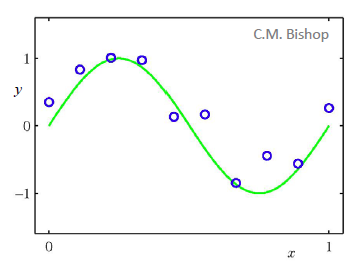

Blue circles are generated by adding small random noise to a sine curve(green curve): $y(x)= \sin (2 \pi x)+\operatorname{noise}(x)$

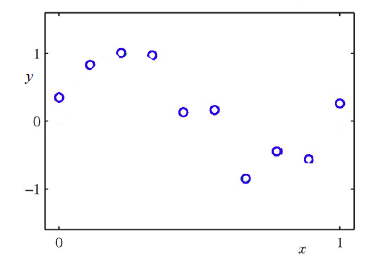

Polynomial regression is fitting a curve, so that we can predict a $y$ value for any $x$ value.

$$y(x, \boldsymbol{w})=w_{0}+w_{1} x+w_{2} x^{2}+\cdots+w_{M} x^{M}$$

## Step 1. Data Generation

At first, we are going to generate the samples with random noise and the generation model is the following:

$$y = 2\sin(1.4 x) + \epsilon$$

The blue line indicates the ground truth value.

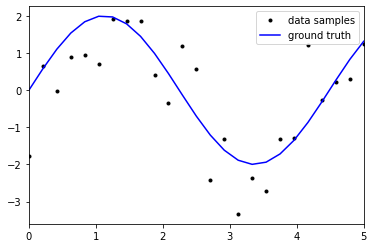

In [2]:
def sample(sample_size, interval, noise=1.):
    x = np.linspace(*interval, sample_size)
    ground_truth = 2 * np.sin(1.4 * x)
    y = ground_truth + np.random.randn(x.size) * noise
    return x, y, ground_truth

sample_size = 25
interval = (0, 5)

np.random.seed(2020)
x, y, ground_truth = sample(sample_size, interval)
plt.plot(x, y, 'k.', label='data samples')
plt.plot(x, ground_truth, 'b', label='ground truth')
plt.xlim(*interval)
plt.legend()
plt.show()

## Step 2-1. Polynomial Regression using Scikit Learn

### Generate polynomial

Generate a new vector consisting of all polynomials of the features with degree less than or equal to the specified degree.
We will use least square regression (LSR) to fit a polynomial to the data. Actually, we will use multivariate linear regression, over a dataset built in the following way:


For each sample $x_{i}$ we build a vector $(1 , x_{i} , x_{i}^{2} , \dots , x_{i}^{n})$  and we use LSR to fit a function $g:\mathbb{R}^{n+1}\rightarrow\mathbb{R}$ to the training data.

In [3]:
# This illustrate how PolynomialFeatures method works
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)  # degree is 4
x1 = np.array([1, 2, 3]).reshape(-1, 1)  # represent as column vector
poly.fit_transform(x1)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8., 16.],
       [ 1.,  3.,  9., 27., 81.]])

### Define a function for fitting a polynomial regression model

Define regression model and generate polynomial for traning samples. The **fit_ploynomial** function is fitting a polynomial model with the input samples $x$. Using fit_transform, transform each sample x to a vector.

If the degree is 5, each x sample transform to $X = (1 , x_{i} , x_{i}^{2} , \dots , x_{i}^{5})$. Then fit model with transformed input vectors $X$ and $y$.

In [4]:
# define regression model and generate polynomial for training sample
from sklearn.linear_model import LinearRegression

def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial model with the input samples x.
    (x, y): input sample
    degree: polynomial degree
    '''
    ################ start your code here ################
    poly = 
    model = LinearRegression()
    X = 
    ######################################################
    model.fit(X, y)
    return model

### Define a function for evaluating a fitted polynomial regression model

After fitting the model, evaluate a fitted polynomial model with input sample $x$. Then compare the ground truth line and evaluate ploynomial line.

In [5]:
def evaluate_polynomial(model, x):
    '''
    Evaluate a fitted polynomial model with input sample x
    model: fitted polynomial model
    x: samples to be evaluated
    '''
    degree = model.coef_.size - 1
    ################ start your code here ################
    poly = 
    X = 
    ######################################################
    y = model.predict(X)
    return y

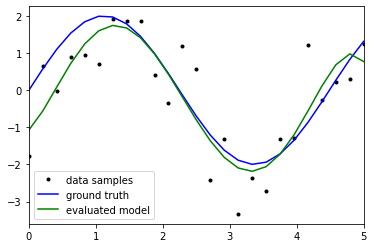

In [6]:
degree = 5
model = fit_polynomial(x, y, degree)
p_y = evaluate_polynomial(model, x)

plt.plot(x, y, 'k.', label='data samples')
plt.plot(x, ground_truth, 'b', label='ground truth')
plt.plot(x, p_y, 'g', label='evaluated model')
plt.xlim(*interval)
plt.legend()
plt.show()

## Step 2-2. Polynomial Regression with Regularization

Overfitting often arises as some coefficients taking values that are too large in magnitude.
A simple way to check this behavior is to add a penalty term to the loss function:

$$J(\boldsymbol{w})= \sum_{i=1}^{N}\left\{t_{i}-y\left(x_{i}, \boldsymbol{w}\right)\right\}^{2}+\lambda\|\boldsymbol{w}\|^{2}$$

### Define a function for fitting a polynomial regression model with regularization

You can use Ridge regressor which impose a penalty on the size of the coefficients.

In [7]:
from sklearn.linear_model import Ridge

def fit_polynomial_reg(x, y, degree, lambda_):
    '''
    Evaluate a fitted polynomial model with regularization term
    model: fitted polynomial model
    x: samples to be evaluated
    lambda: regularization penalty
    '''
    ################ start your code here ################
    poly = 
    model = Ridge(alpha=lambda_)
    X = 
    ######################################################
    model.fit(X, y)
    return model

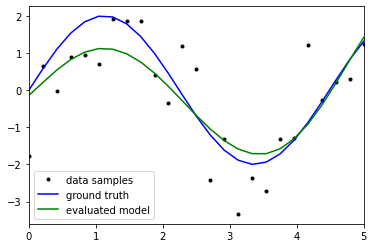

In [8]:
np.random.seed(2020)
x, y, ground_truth = sample(sample_size, interval)
degree = 5
lambda_ = 1

model = fit_polynomial_reg(x, y, degree, lambda_)
p_y = evaluate_polynomial(model, x)

plt.plot(x, y, 'k.', label='data samples')
plt.plot(x, ground_truth, 'b', label='ground truth')
plt.plot(x, p_y, 'g', label='evaluated model')
plt.xlim(*interval)
plt.legend()
plt.show()

### Plotting the regularized polynomial regressor for different regularization parameter lambda

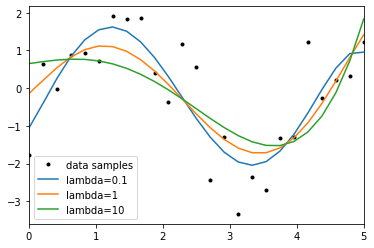

In [9]:
degree = 5
lambdas = [0.1, 1, 10]

plt.plot(x, y, 'k.', label='data samples')
for lambda_ in lambdas:
    model = fit_polynomial_reg(x, y, degree, lambda_)
    p_y = evaluate_polynomial(model, x)
    plt.plot(x, p_y, label='lambda={}'.format(lambda_))
    
plt.xlim(*interval)
plt.legend()
plt.show()

## Step 3: Compute integrated squared bias and integrated variance

Compute bias and variance of models trained on 
100 different datasets.
The average prediction is estimated from
\begin{equation}
\bar{y}(x) = \frac{1}{L} \sum_{l=1}^L y^{(l)} (x)
\end{equation}
and the integrated squared bias and integrated variance are given by
\begin{align}
\text{(bias)}^2 \hspace{3mm}
= \hspace{3mm}
& \frac{1}{N} \sum_{n=1}^N \{ \bar{y}(x_n) - h(x_n) \}^2, \\
\text{variance} \hspace{3mm}
=\hspace{3mm}
 & \frac{1}{N}\sum_{n=1}^{N} \frac{1}{L} \sum_{l=1}^{L} \{y^{(l)}(x_n) - \bar
{y} (x_n) \}^2.
\end{align}
Here, $N=25$ is the number of data points (specified by "sample_size"), $L=100$ is the number of data sets (specified by "n_models"),
$y^{(l)}$ is $l^{\text{th}}$ model prediction function, and $h$ is the optimal prediction function. (You can consider the "ground truth" as an optimal predictor $h$)


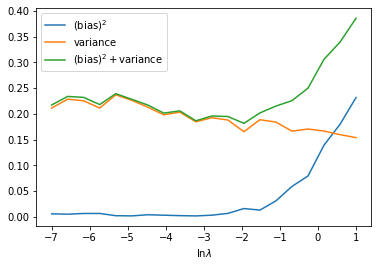

In [10]:
from numpy.linalg import norm

np.random.seed(10)
degree = 5
sample_size = 25
n_models = 100
linpenals = np.linspace(start=-7, stop=1, num=20) # Regularization parameter (lambda) = e^-7, e^-6, ..., e^1
lambdas = np.power(np.e, linpenals)

x_test, y_test, ground_truth = sample(sample_size, interval, noise=2.)

bias = []
variance = []


for lambda_ in lambdas:
# Plot squared bias and variance, together with their sum 
    
    avg_y = np.zeros(sample_size)
    models = []
    for i in range(n_models):
        
        x, y, _ = sample(sample_size, interval, noise=1.)
        model = fit_polynomial_reg(x, y, degree, lambda_)
        
        p_y = evaluate_polynomial(model, x_test)
        avg_y = avg_y + p_y
        models.append(p_y)
        
    avg_y = avg_y / n_models
    
    ####################### compute Bias^2  #######################
    bias_val = 
    bias.append(bias_val)
    ###############################################################

    ####################### compute variance  #####################
    var_val = 0
    for p_y in models:
        var_val = 
    variance.append(var_val / n_models)
    ###############################################################

plt.plot(linpenals, bias, label='(bias)$^{2}$')
plt.plot(linpenals, variance, label='variance')
plt.plot(linpenals, np.array(bias) + np.array(variance), label='(bias)$^{2} + $variance')
plt.xlabel('$\ln\lambda$')
plt.legend()
plt.show()

## References

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://scikit-learn.org/stable/modules/linear_model.html

https://gist.github.com/fabgoos/6788818